In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
%matplotlib inline     
sns.set(color_codes=True)


## Import data

In [3]:
!pwd
df = pd.read_csv('../data/data_new.csv', na_values=["?", "undefined"])

df.head()

/home/elmer/dev_debian/working/python3/MIWProject1/build/notebooks


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0


## Describe data

#### Summary
* Data counts 4095 entries
* Data has no duplicates
* Data has 10 rows with missing data
* With so little missing data, it is safe to remove the rows with missing data
* lifespan has 2 negative values in the data which are outliers that I have removed

In [4]:
# get info on missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   sugar     4095 non-null   float64
 7   lifespan  4096 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB


In [5]:
# describe dataset
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,4095.000000,4093.000000,4094.000000,4095.000000,4096.000000,4094.000000,4095.000000,4096.000000
mean,82.268352,183.880283,92.268442,2.402125,9.807446,2.264558,6.482955,80.127783
std,7.442579,12.623054,25.791314,1.170062,6.921461,1.800523,2.710213,8.042270
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,-1.000000
25%,77.600000,175.000000,71.500000,1.500000,3.300000,0.600000,4.400000,75.000000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000
75%,86.700000,193.000000,110.875000,3.200000,15.900000,4.000000,8.400000,85.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000


In [31]:
# I found negative lifespan values in the dataset, how many do we have
display(df[df['lifespan'] < 10])
# Only two, so I will remove it from the df
df = df[~(df['lifespan'] < 10)]
df[df['lifespan'] < 10]
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,6.487169,80.177693
std,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,2.708622,7.840508
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,57.000000
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,4.400000,75.000000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,8.400000,85.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000


In [7]:
# do we have duplicate rows in the dataframe
df[df.duplicated()].shape

(0, 8)

In [8]:
# do we have missing values
df.isna().sum()

genetic     1
length      3
mass        2
exercise    1
smoking     0
alcohol     2
sugar       1
lifespan    0
dtype: int64

In [9]:
# which rows have missing values
df[df.isnull().any(axis=1)]

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
947,82.0,193.0,68.0,1.3,17.2,NaN,1.2,75.3
1038,81.5,NaN,100.2,2.5,8.9,1.3,7.9,81.2
1861,76.7,NaN,115.9,1.1,4.8,3.1,2.9,74.4
2354,74.8,183.0,123.2,2.3,13.8,NaN,8.1,70.4
2576,76.4,174.0,90.9,NaN,21.7,0.4,3.7,71.0
2721,88.9,179.0,NaN,3.1,0.2,0.5,5.1,91.5
2793,78.0,178.0,71.9,1.3,0.1,4.1,NaN,77.4
3043,66.7,NaN,74.0,2.4,0.1,2.0,10.5,67.6
3398,NaN,204.0,72.0,1.0,9.9,0.4,5.4,83.0
4027,67.3,180.0,NaN,1.6,0.0,0.4,5.3,67.9


In [10]:
# Percentage wise we have so little missing data that it is safe to drop them from the dataframe
df = df.dropna()
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0


## Outliers

#### Summary
The Seaborn boxplots - which plot the whiskers at 1.5 maximum distance from the interquartile range (IQR) by default - do highlight some outliers in genetic and lifespan.<br>
Since the goal is to build a model that can accurately predict the lifespan of patients visiting the doctor, removing these outliers would only make sense with a good reason to do so. Looking at the histograms, I do not see anything disturbing yet.

From: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/assumptions-of-regression-analysis.html#:~:text=Regression%20Assumptions&text=The%20chosen%20sample%20is%20representative,a%20histogram%20of%20the%20residuals.

For the simple and multiple regression model to hold there are some assumptions we need to make:

* The chosen sample is representative of the population. --> **Assumed**
* There is a linear relationship between the independent variable(s) and the dependent variable. --> **To check with pairplots and correlation plots**
* All the variables are normally distributed; to check, plot a histogram of the residuals. --> **Fit inputs one by one to lifespan with Ordinary Least Squares and plot histogram of the residuals**
* There are no outliers, (if there are outliers they need to be removed); to check use a test for detecting outliers. --> **Already checked with boxplots**
* The independent variables are all linearly independent (no variable dependents of the other variables); to check plot the independent values against each other and look for a correlation. --> **To check with pairplots and correlation plots**
* For multiple regression there should be at least five times as many pairs of data than dependent variables. --> **Confirmed**



<AxesSubplot: xlabel='lifespan'>

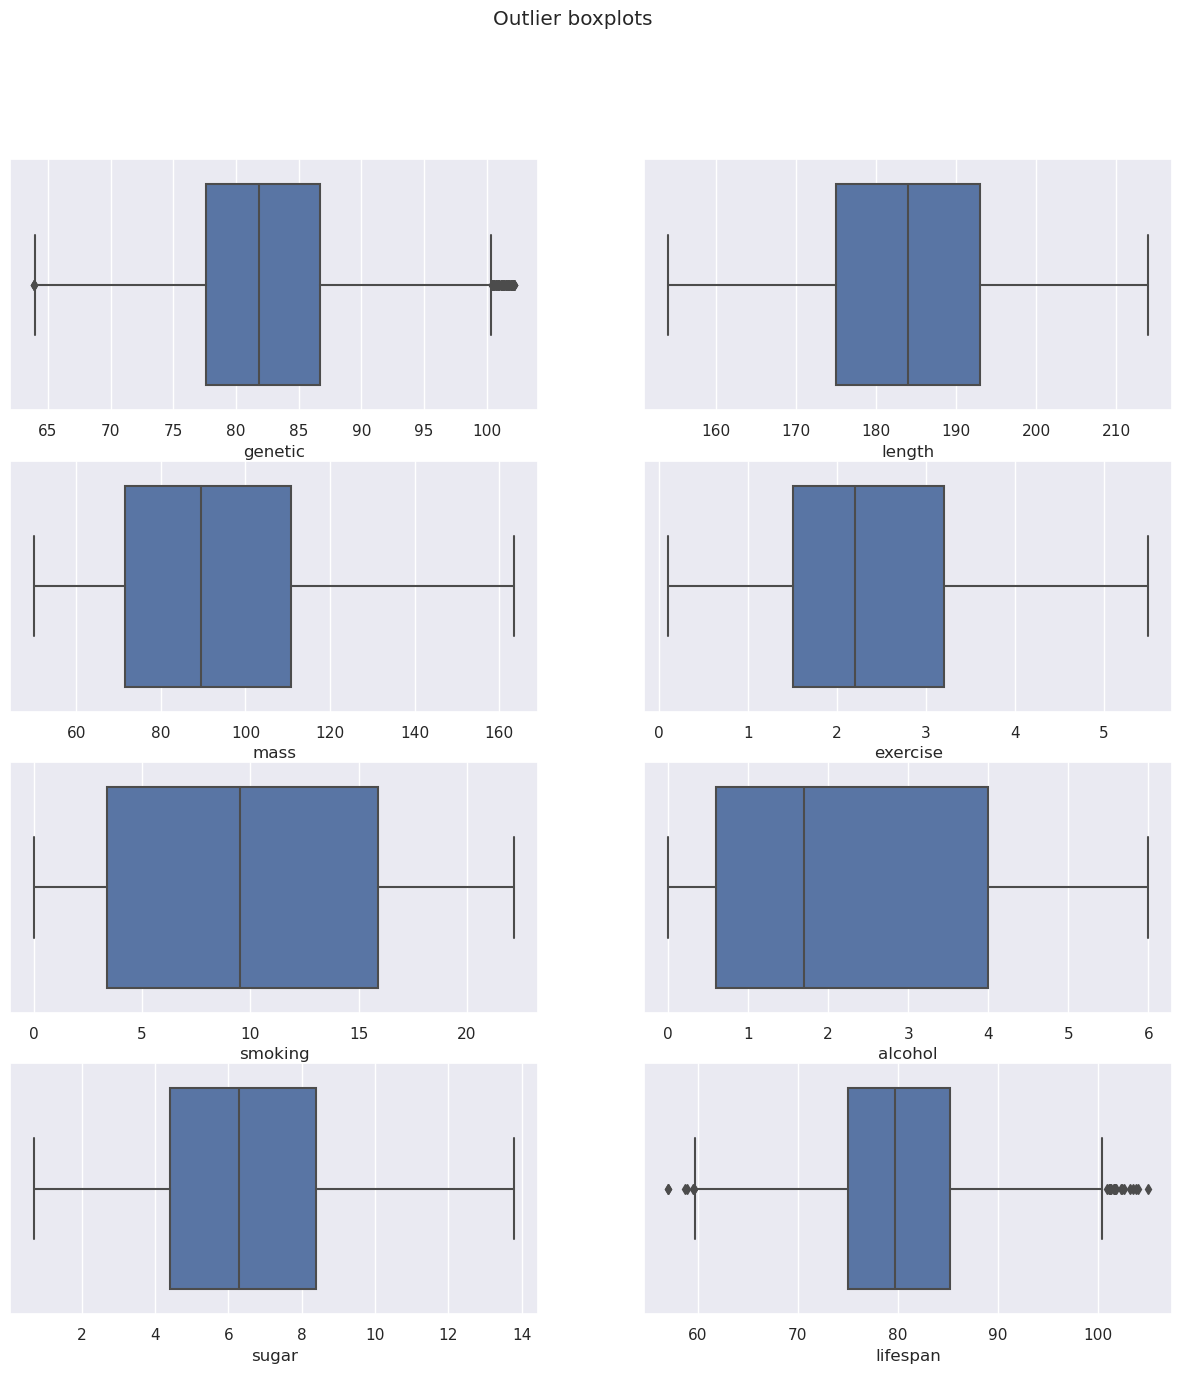

In [11]:
# Looking for outliers
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Outlier boxplots')
sns.boxplot(ax=axes[0, 0], x=df['genetic'])
sns.boxplot(ax=axes[0, 1], x=df['length'])
sns.boxplot(ax=axes[1, 0], x=df['mass'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'])

# TODO: are these really outliers? Currently I don't see reason to remove them from the dataset. They might be of interest with the application in mind.

<AxesSubplot: xlabel='lifespan', ylabel='Count'>

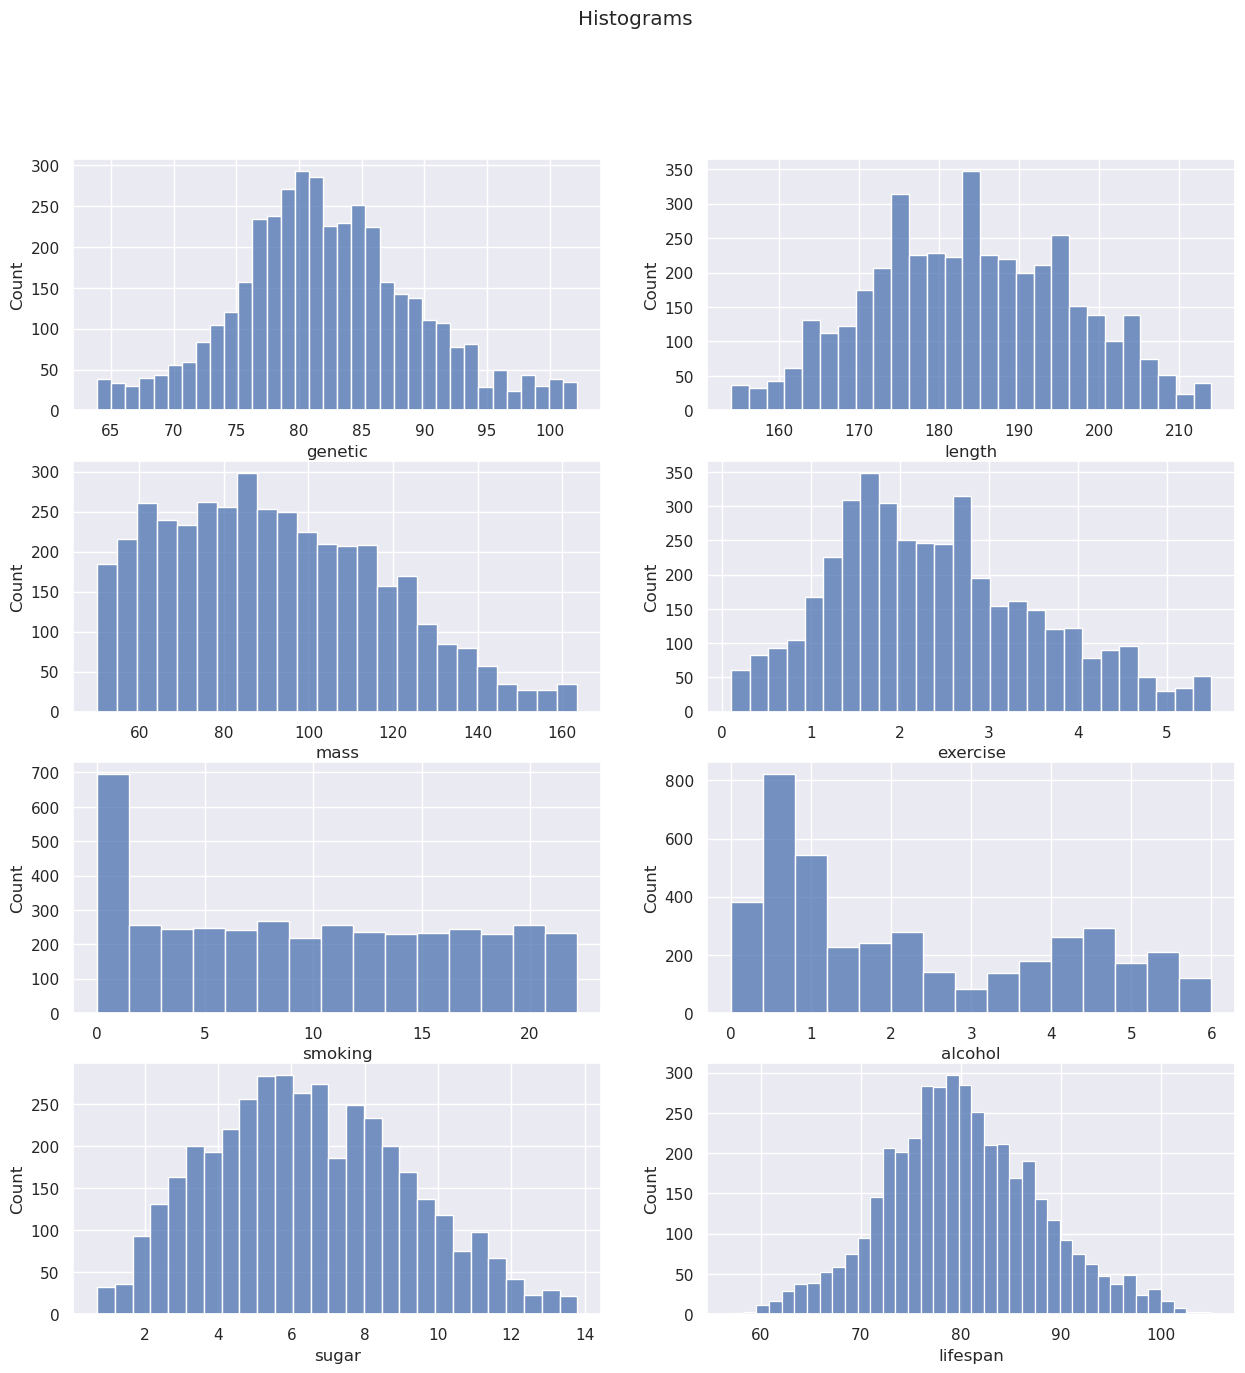

In [12]:
# What is the distribution of values
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms')
sns.histplot(ax=axes[0, 0], x=df['genetic'])
sns.histplot(ax=axes[0, 1], x=df['length'])
sns.histplot(ax=axes[1, 0], x=df['mass'])
sns.histplot(ax=axes[1, 1], x=df['exercise'])
sns.histplot(ax=axes[2, 0], x=df['smoking'])
sns.histplot(ax=axes[2, 1], x=df['alcohol'])
sns.histplot(ax=axes[3, 0], x=df['sugar'])
sns.histplot(ax=axes[3, 1], x=df['lifespan'])

# Also in the histograms I don't see outliers. Some have a longer tail. TODO: Sugar 5 might be an outlier?

## Checking for normality

* Fit inputs one by one to lifespan with Ordinary Least Squares and plot histogram of the residuals
* Plot QQ-plot of the residuals
* Show Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution.

# Summary
Based on the above plots and tests only length is normally distributed. To be able to create an accurate model having normally distributed data is key.
I am going to check if I can transform the data to make it normally distributed. The transformation I am going to try are:
* z-transformations
* sqrt
* cuberoot
* inverse
* inverse square



Shapiro-Wilk test for Genetic --> p-value: 2.1752205885041537e-14 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Length --> p-value: 0.43276166915893555 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Mass --> p-value: 8.964663794545595e-22 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Exercise --> p-value: 4.328965725265308e-22 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Smoking --> p-value: 2.5563253405431584e-33 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Alcohol --> p-value: 2.1019476964872256e-43 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Sugar --> p-value: 4.3572316707398556e-14 (p-value > 0.05 means data is normally distributed)


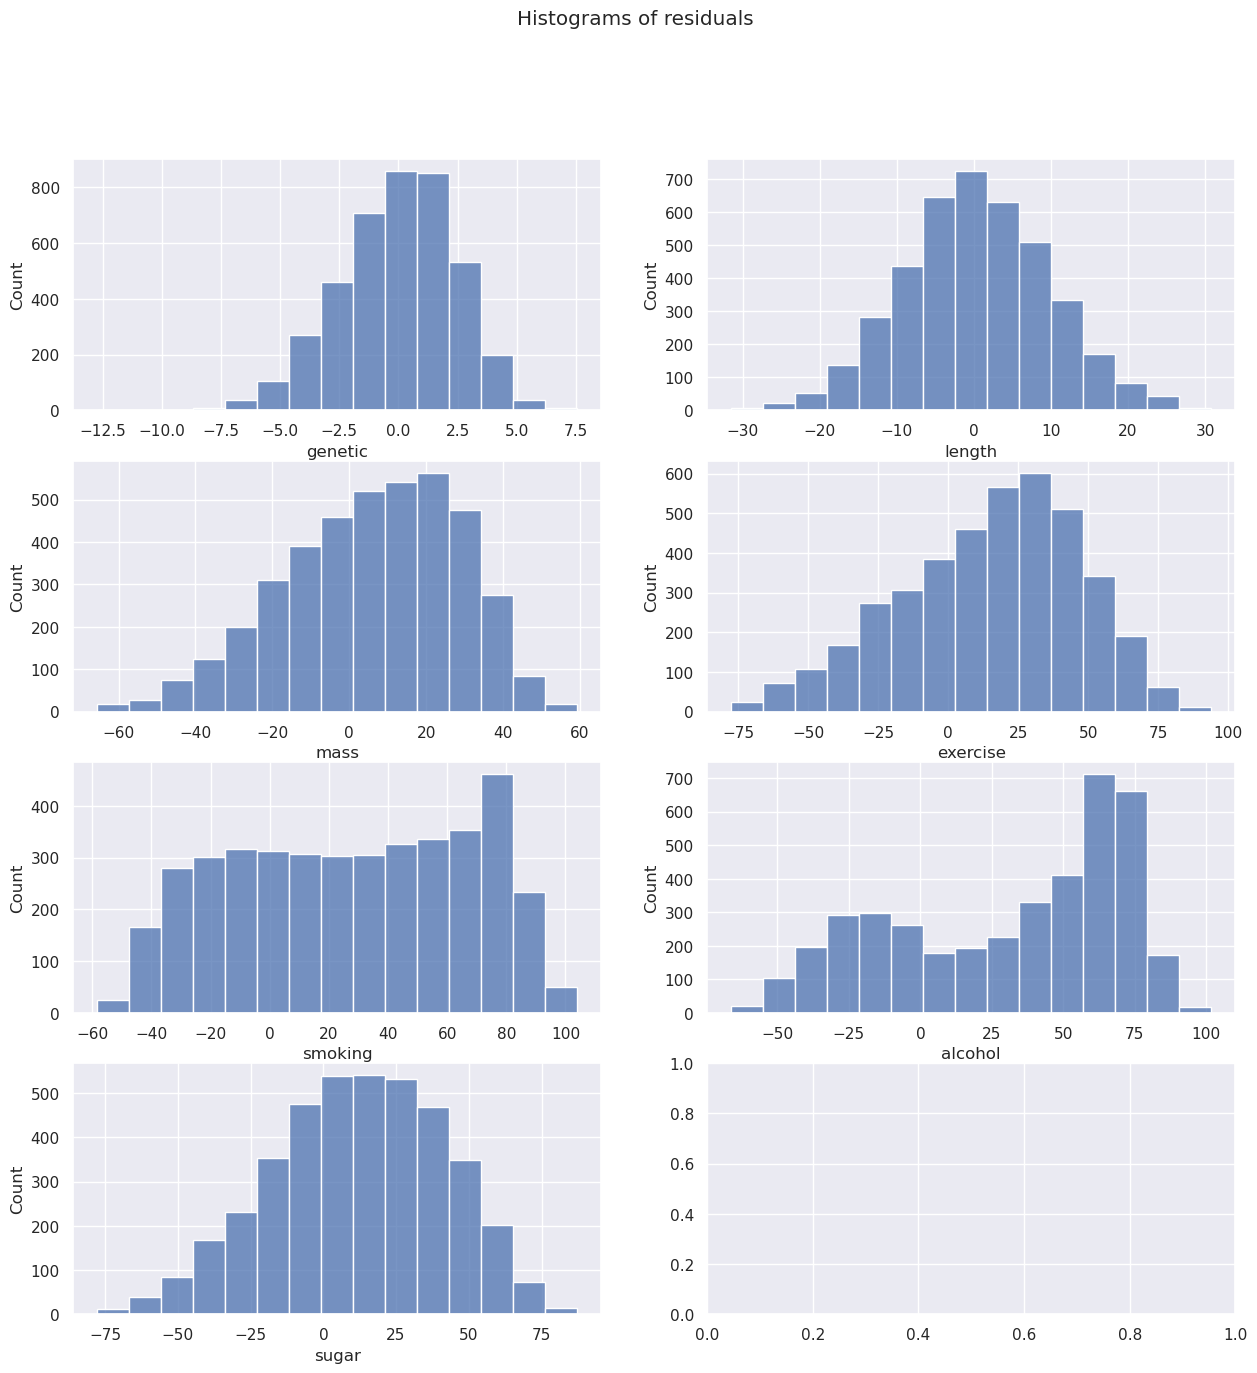

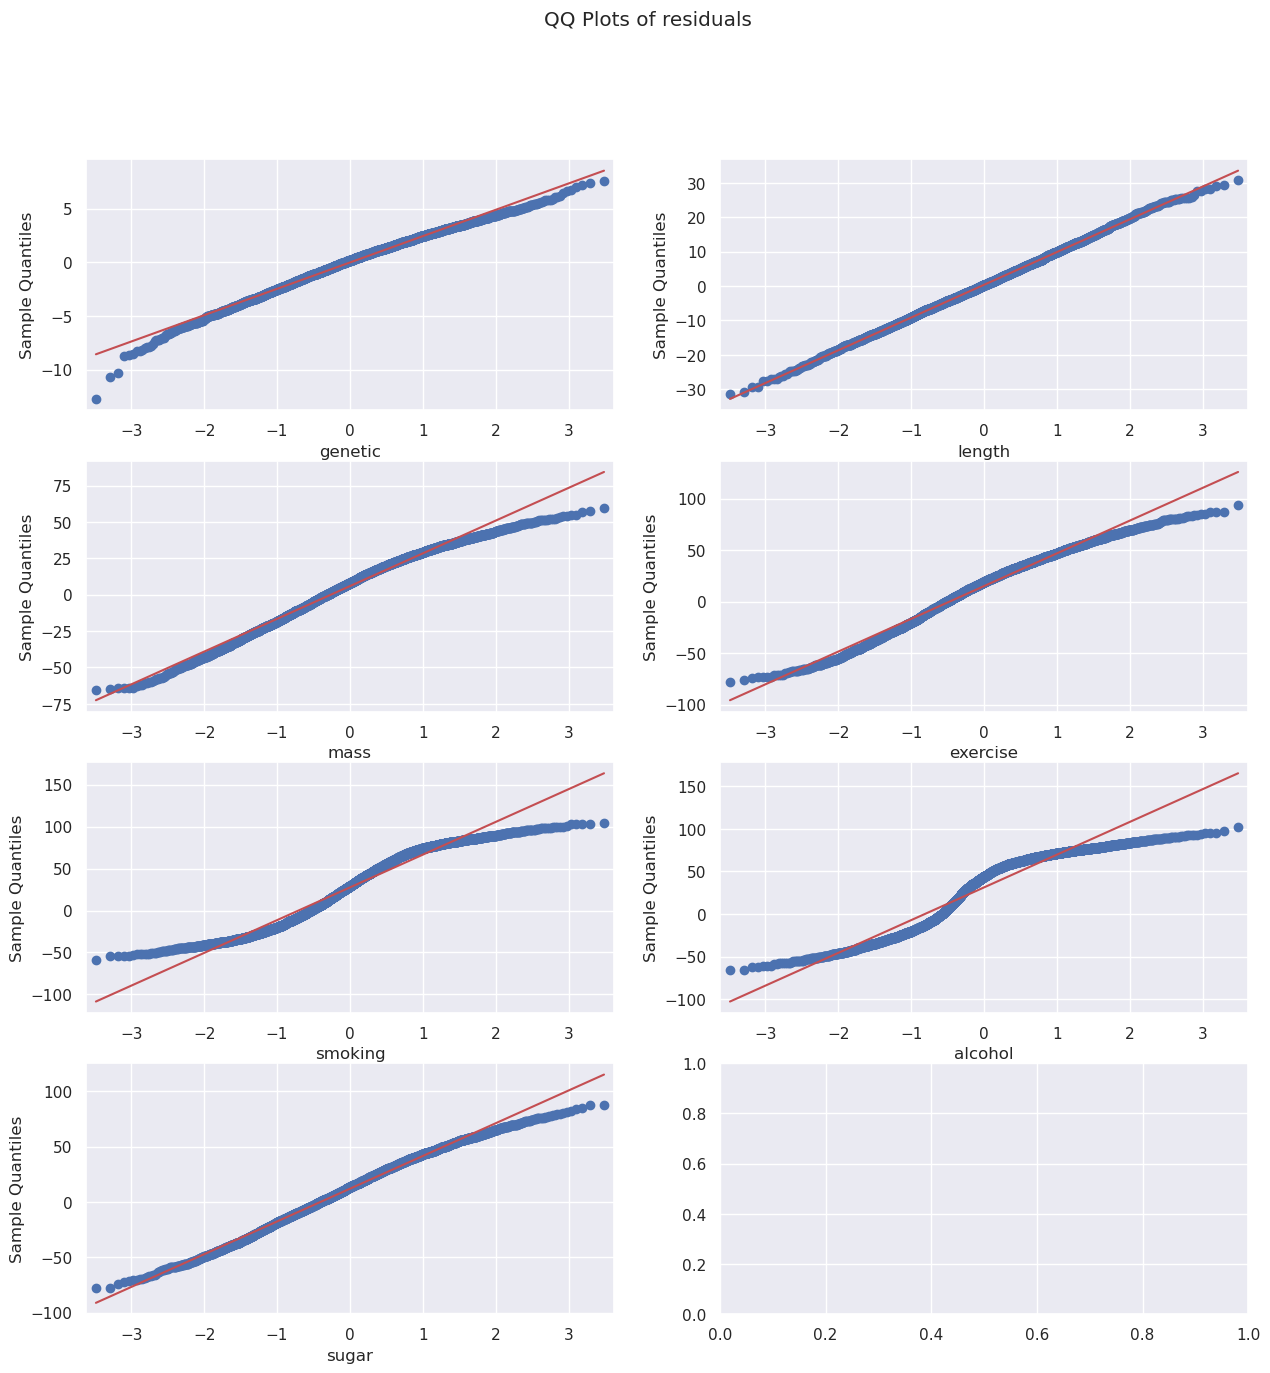

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms of residuals')

fig2, axes2 = plt.subplots(4, 2, figsize=(15, 15))
fig2.suptitle('QQ Plots of residuals')

k=-1
residuals = []
for i, column in enumerate(df.loc[:, ~df.columns.isin(['lifespan'])].columns):
    l=1
    if i % 2 == 0:
        l=0
        k += 1
        
    model = sm.OLS(df['lifespan'], df[column])
    results = model.fit()
    residuals = df['lifespan'] - results.predict()
    residuals.rename(column, inplace=True)
    sns.histplot(ax=axes[k, l], bins=15, x=residuals)
    sm.qqplot(residuals, ax=axes2[k, l], line='r', xlabel=column)
    print(f"Shapiro-Wilk test for {column.capitalize()} --> p-value: {scipy.stats.shapiro(residuals).pvalue} (p-value > 0.05 means data is normally distributed)")



In [ ]:
# Create category showing if the person smokes yes or no
df['is_smoking'] = np.where(df['smoking'] == 0, 'Non-Smoking', 'Smoking')
df['is_smoking'].value_counts()

Smoking        4031
Non-Smoking      53
Name: is_smoking, dtype: int64

<AxesSubplot: xlabel='lifespan', ylabel='is_smoking'>

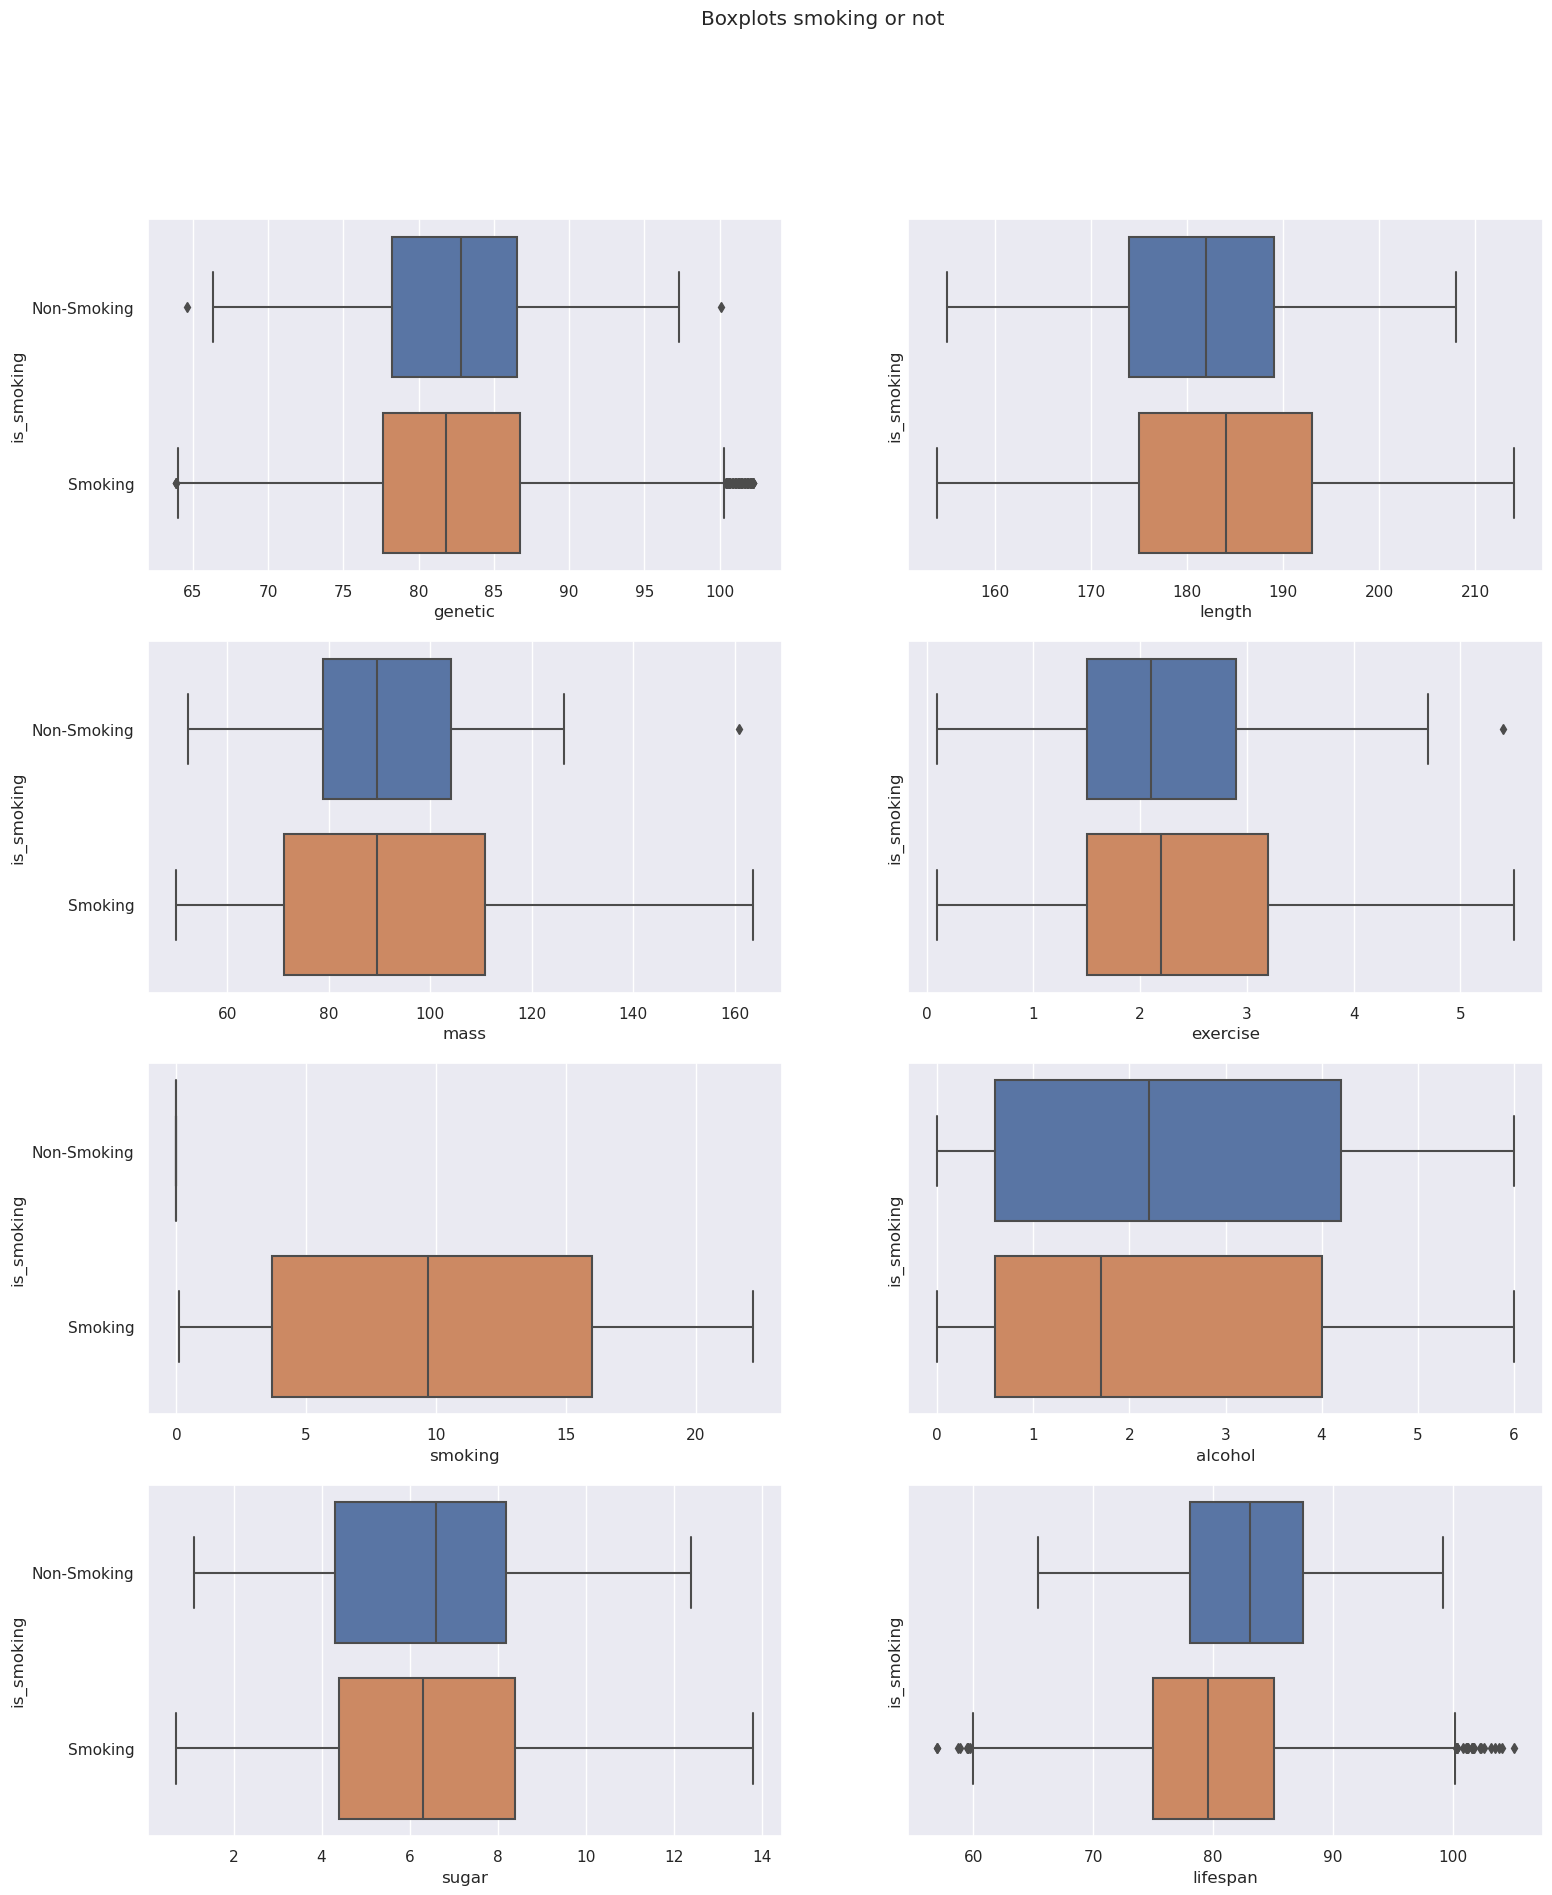

In [ ]:
# Plot boxplots of parameters against is_smoking
fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots smoking or not')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['is_smoking'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['is_smoking'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['is_smoking'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['is_smoking'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['is_smoking'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['is_smoking'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['is_smoking'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['is_smoking'])

<AxesSubplot: xlabel='lifespan', ylabel='Sugar cubes'>

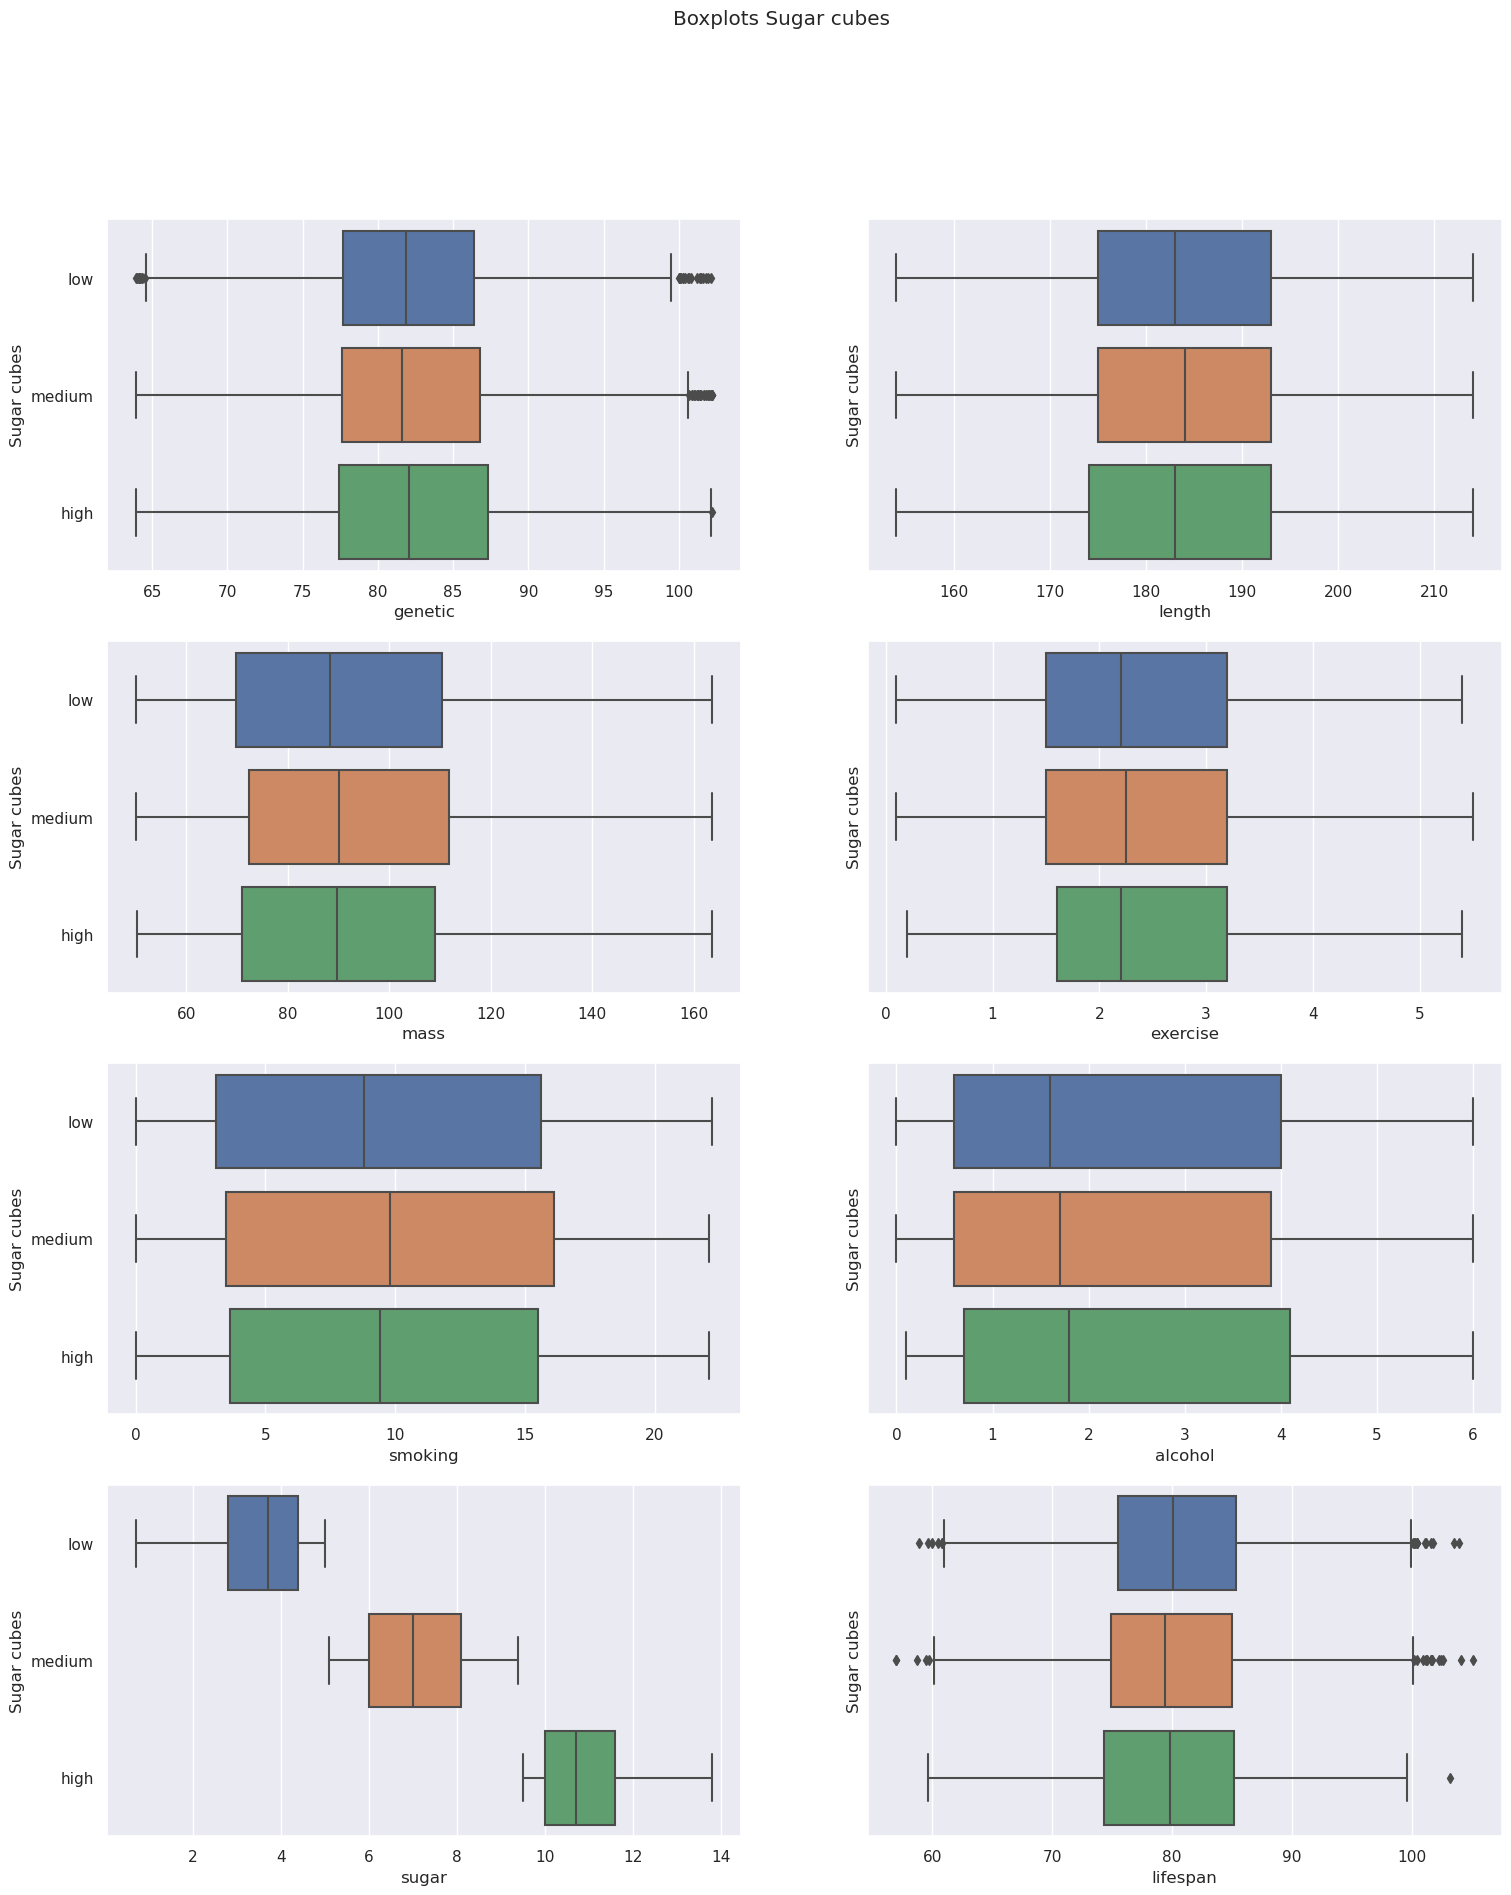

In [ ]:
# Create categories of sugar cubes, alcohol intake and weight
df['Sugar cubes'] = pd.cut(df['sugar'], bins=3, labels=['low', 'medium', 'high'])
df['Alcohol intake'] = pd.cut(df['alcohol'], bins=3, labels=['low', 'medium', 'high'])
df['Weight'] = pd.cut(df['mass'], bins=3, labels=['Below average', 'At average', 'Above average'])

# Plot boxplots of parameters against sugar cubes
fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots Sugar cubes')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['Sugar cubes'])

<AxesSubplot: xlabel='lifespan', ylabel='Alcohol intake'>

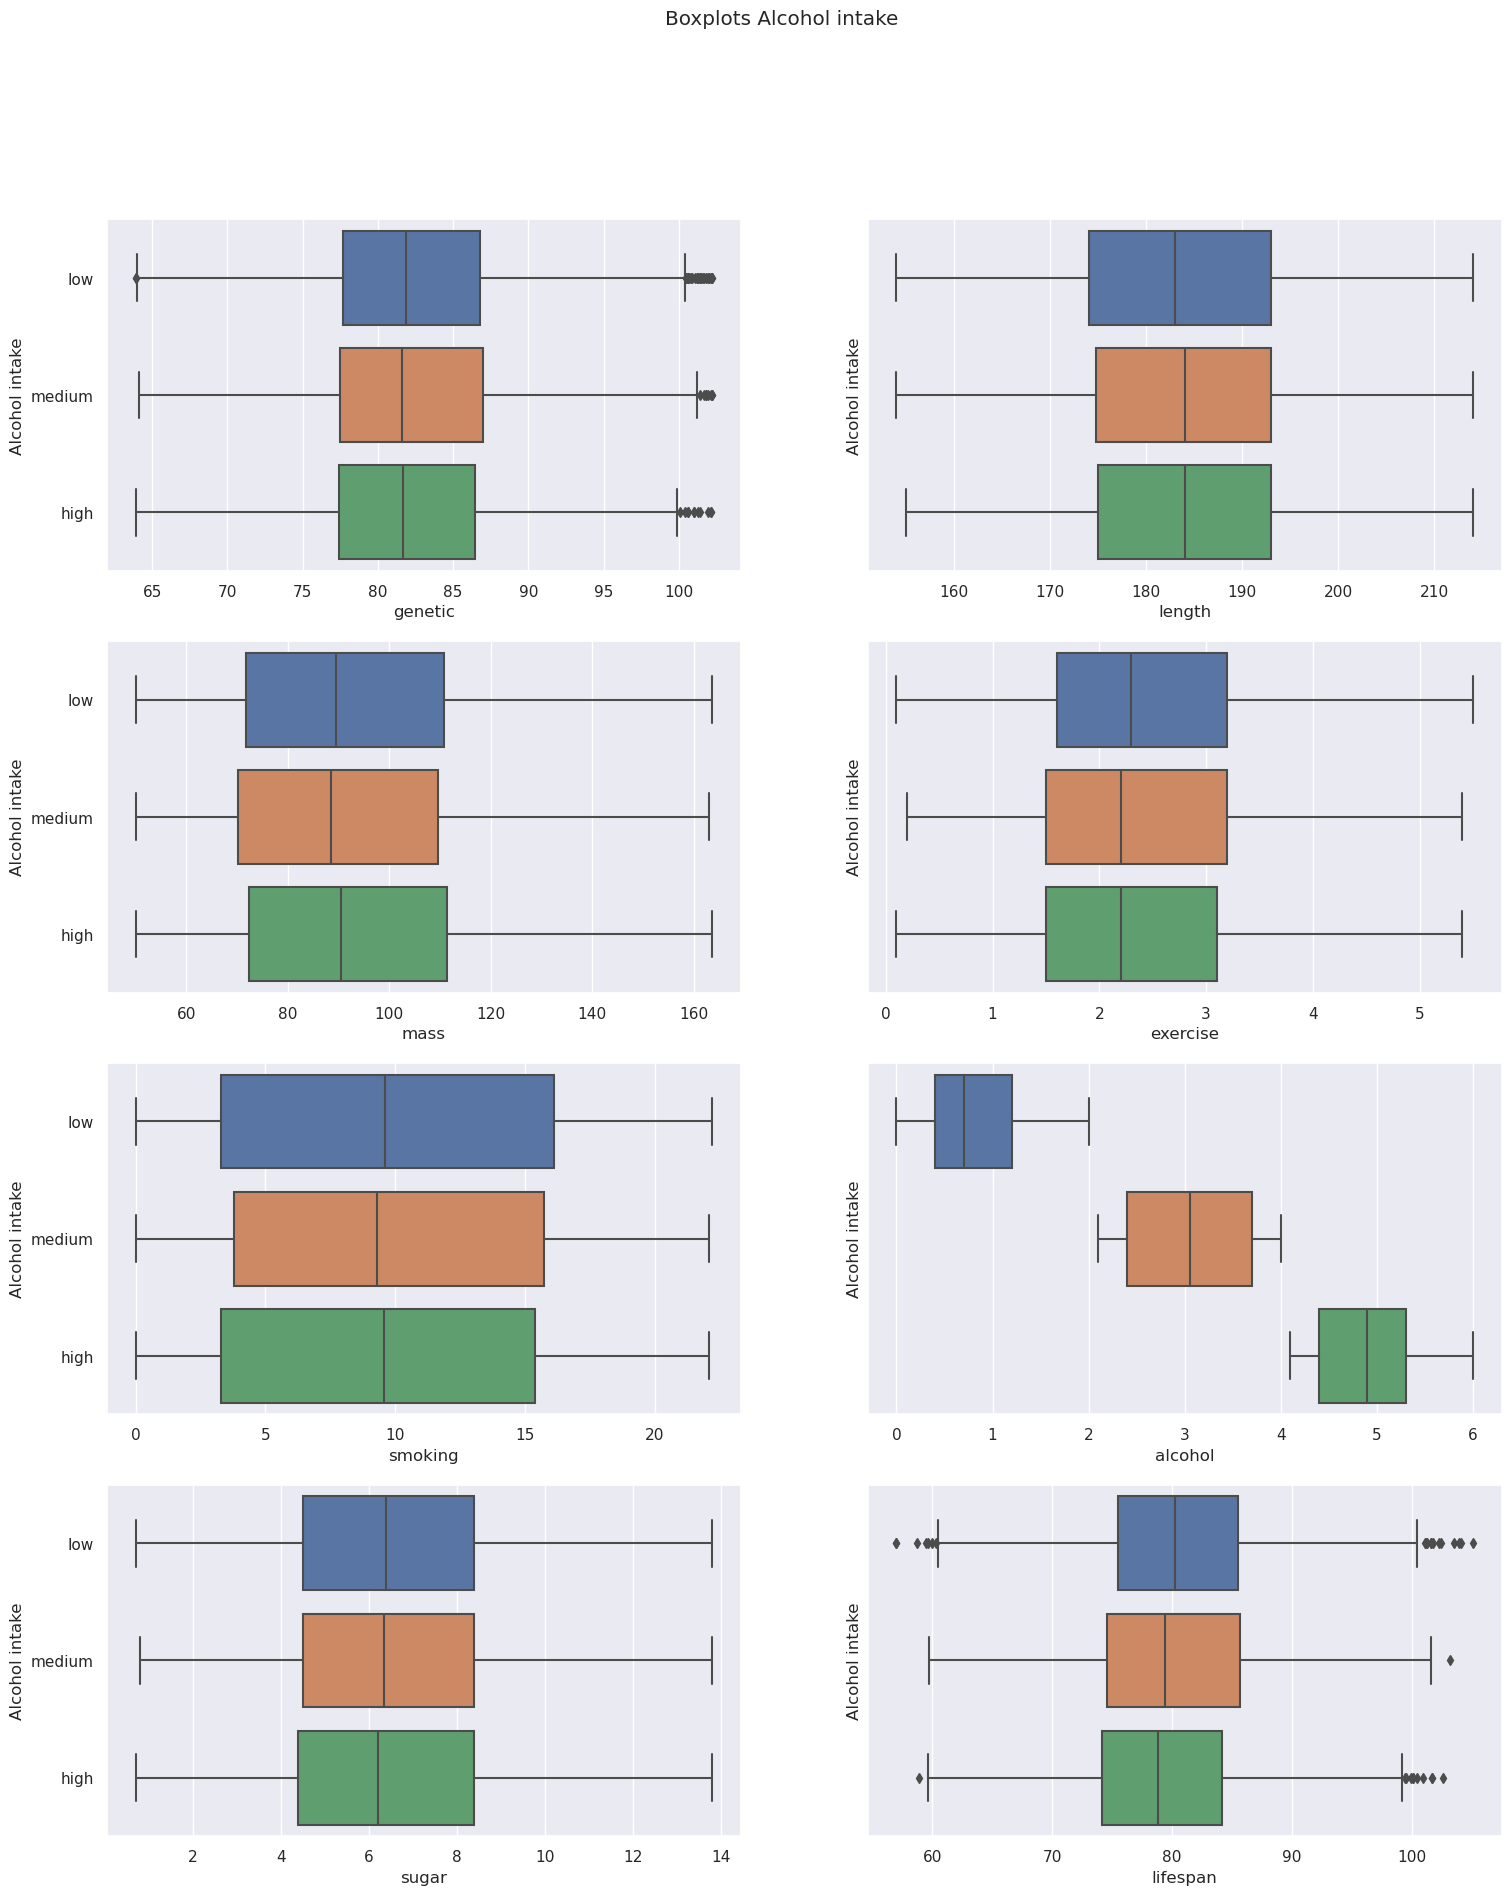

In [ ]:
# Plot boxplots of parameters against Alcohol intake

fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots Alcohol intake')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['Alcohol intake'])

<AxesSubplot: xlabel='lifespan', ylabel='Weight'>

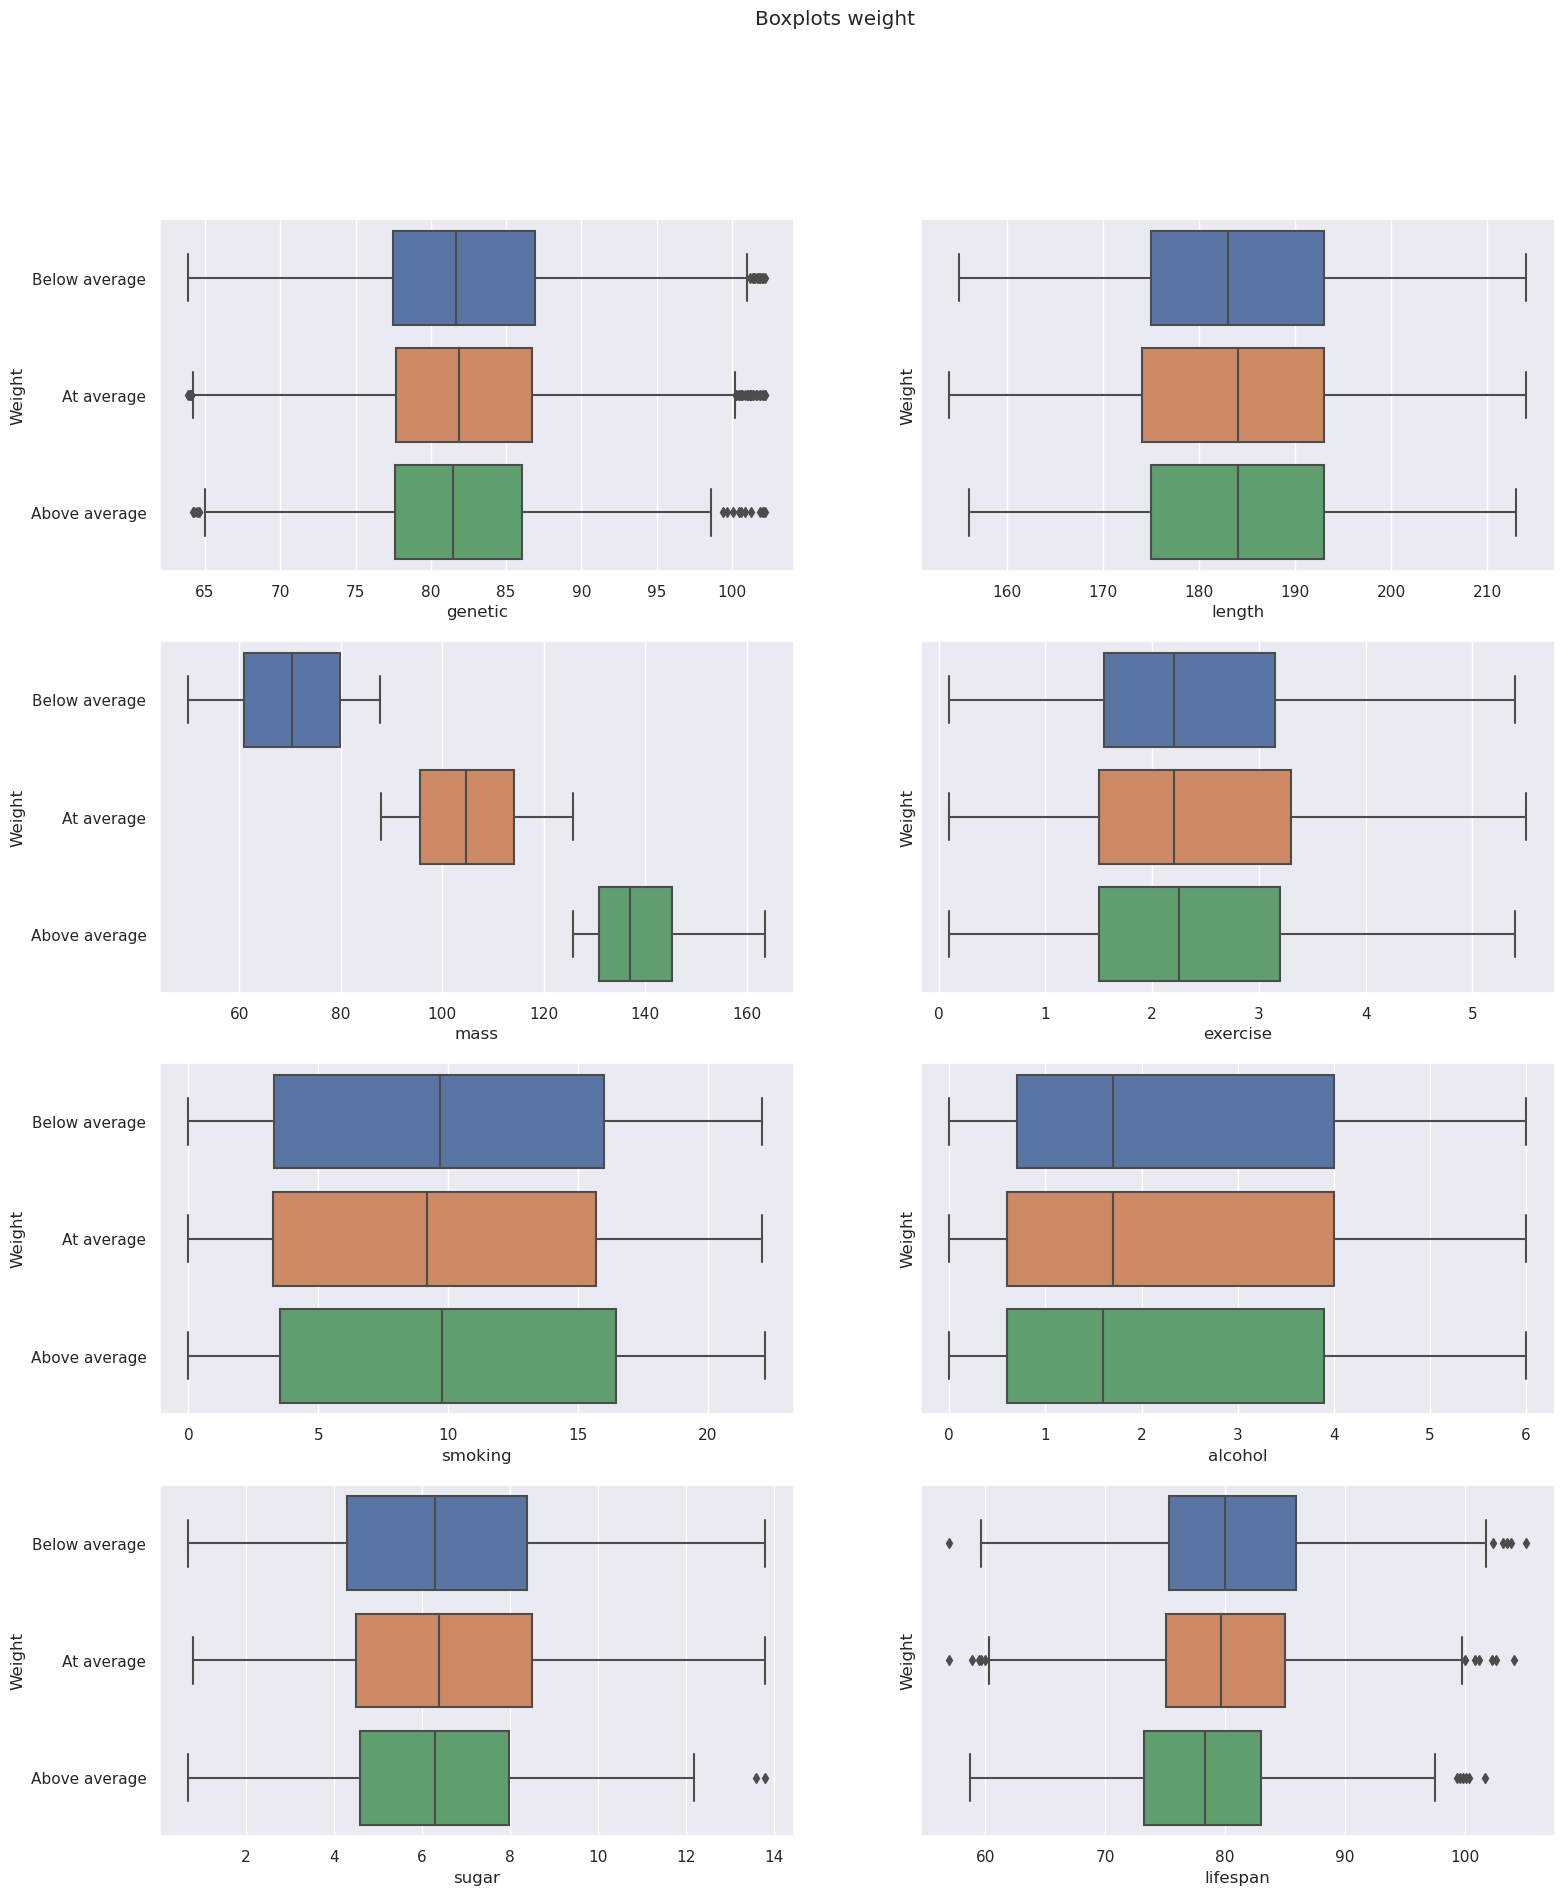

In [ ]:
# Plot boxplots of parameters against Weight

fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots weight')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['Weight'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['Weight'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['Weight'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['Weight'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['Weight'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['Weight'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['Weight'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['Weight'])

In [ ]:
# Adding BMI
df['BMI'] = df['mass'] / (df['length']/100)**2
bmi_bins = [0, 18.5, 25, 30, np.inf]
df['BMI bins'] = pd.cut(df['BMI'], bmi_bins, labels=["Underweight", "Normal", "Overweight", "Obese"])
# reorder columns to put lifespan at the end
df = df.reindex(columns=['genetic', 'length', 'mass', 'BMI', 'exercise', 'smoking', 'alcohol', 'sugar', 'is_smoking', 'Sugar cubes', 'Alcohol intake', 'Weight', 'BMI bins', 'lifespan'])

<AxesSubplot: xlabel='lifespan', ylabel='BMI bins'>

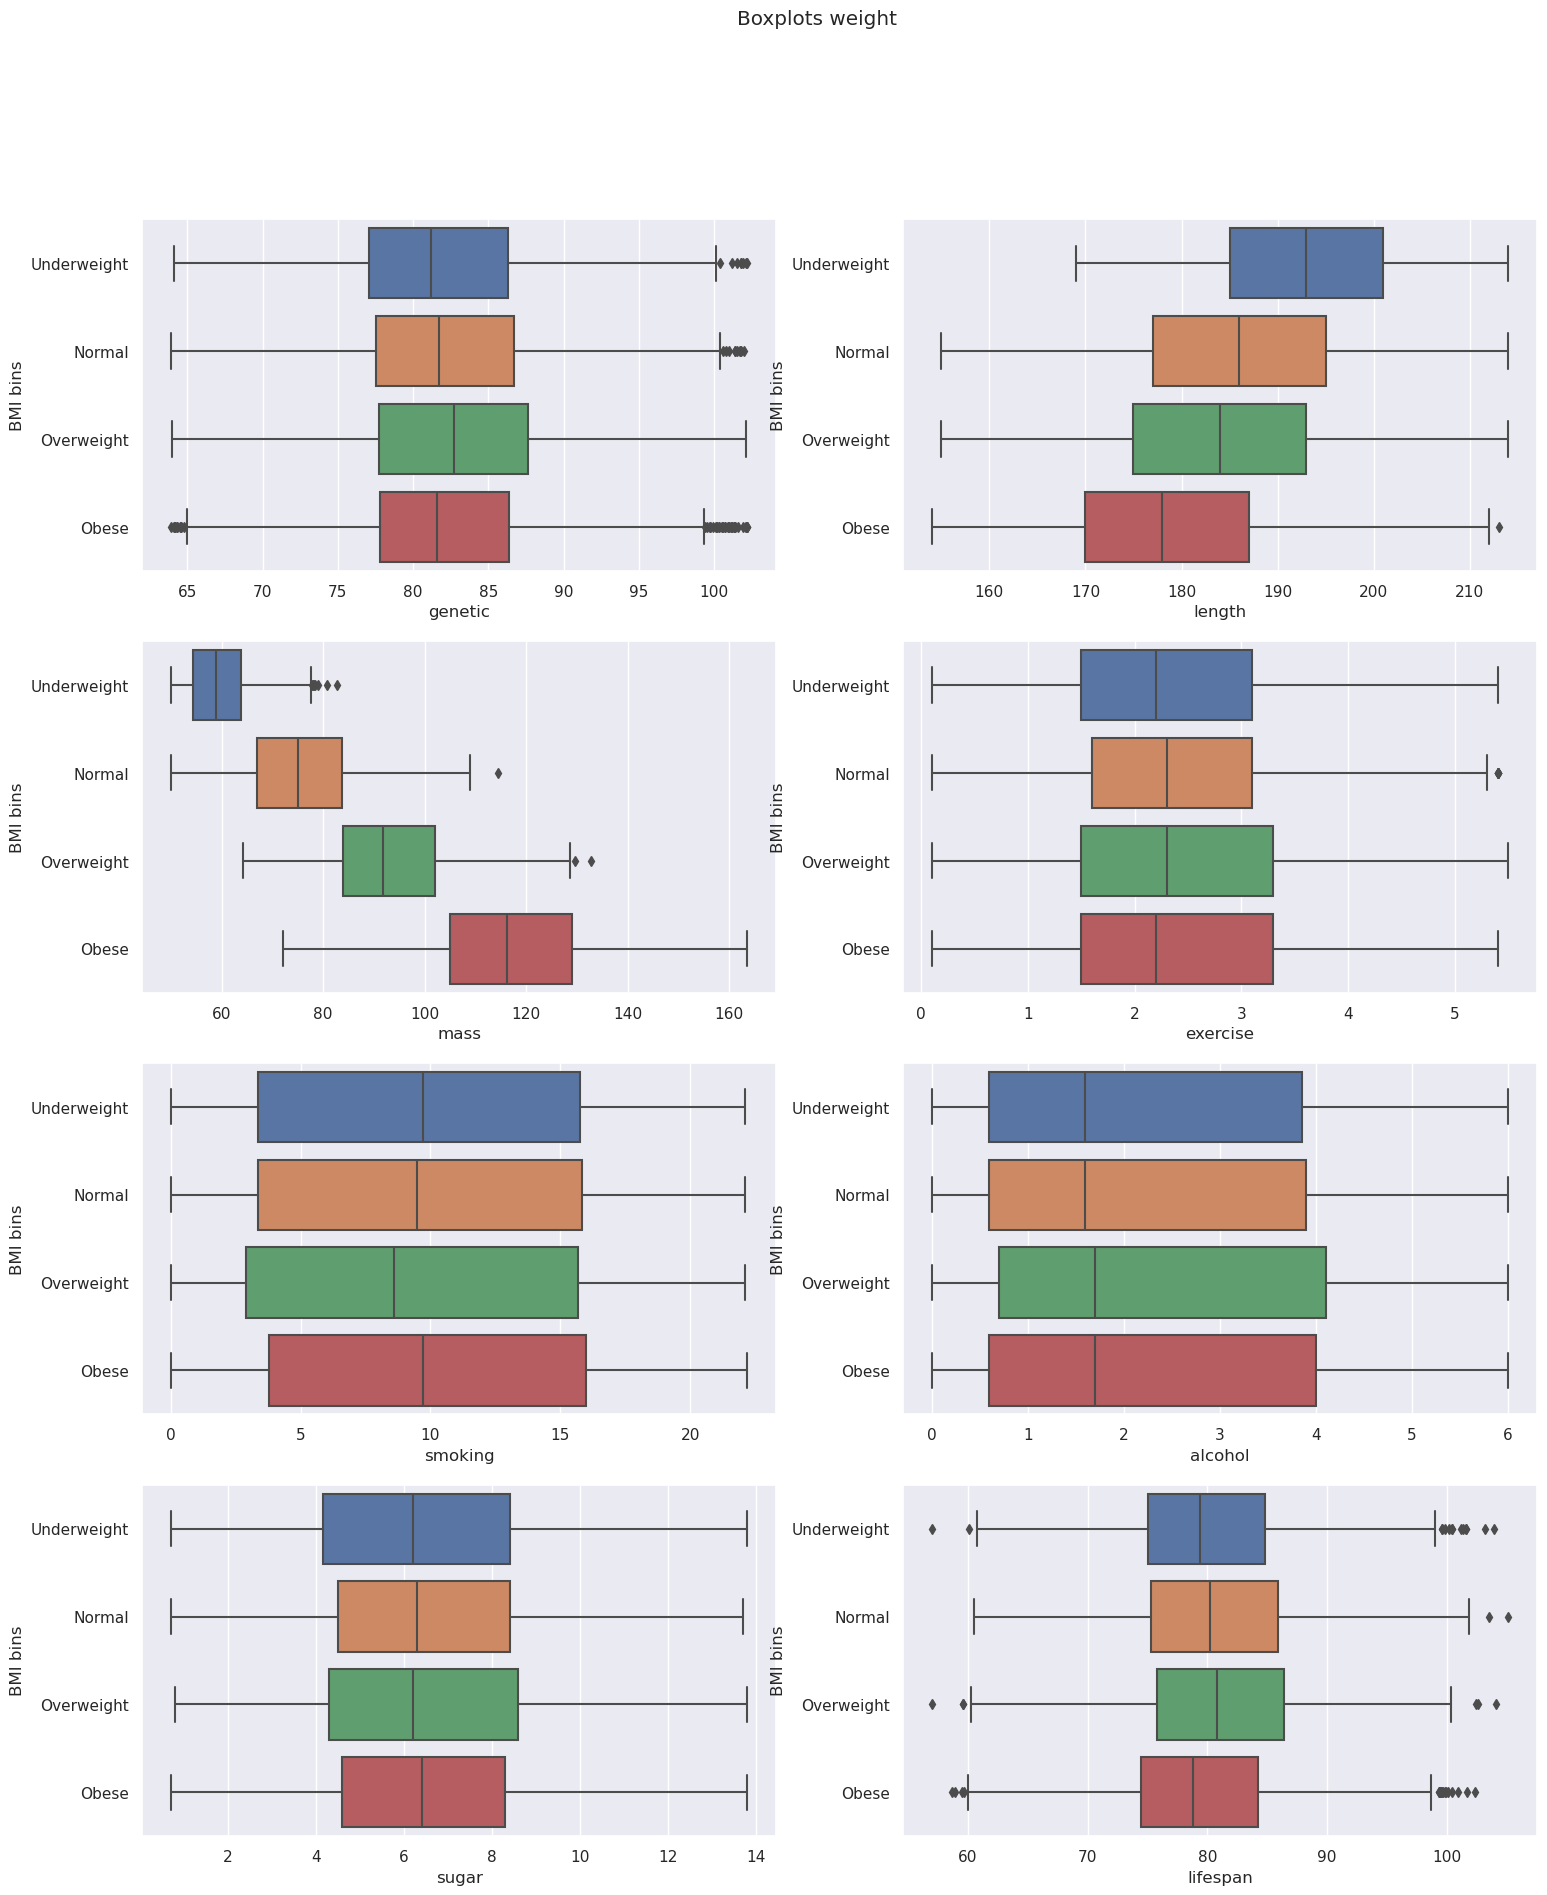

In [ ]:
# Plot boxplots of parameters against BMI bins

fig, axes = plt.subplots(4, 2, figsize=(18, 21))
fig.suptitle('Boxplots weight')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['BMI bins'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['BMI bins'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['BMI bins'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['BMI bins'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['BMI bins'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['BMI bins'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['BMI bins'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['BMI bins'])

## Boxplots of interest

<AxesSubplot: xlabel='lifespan', ylabel='BMI bins'>

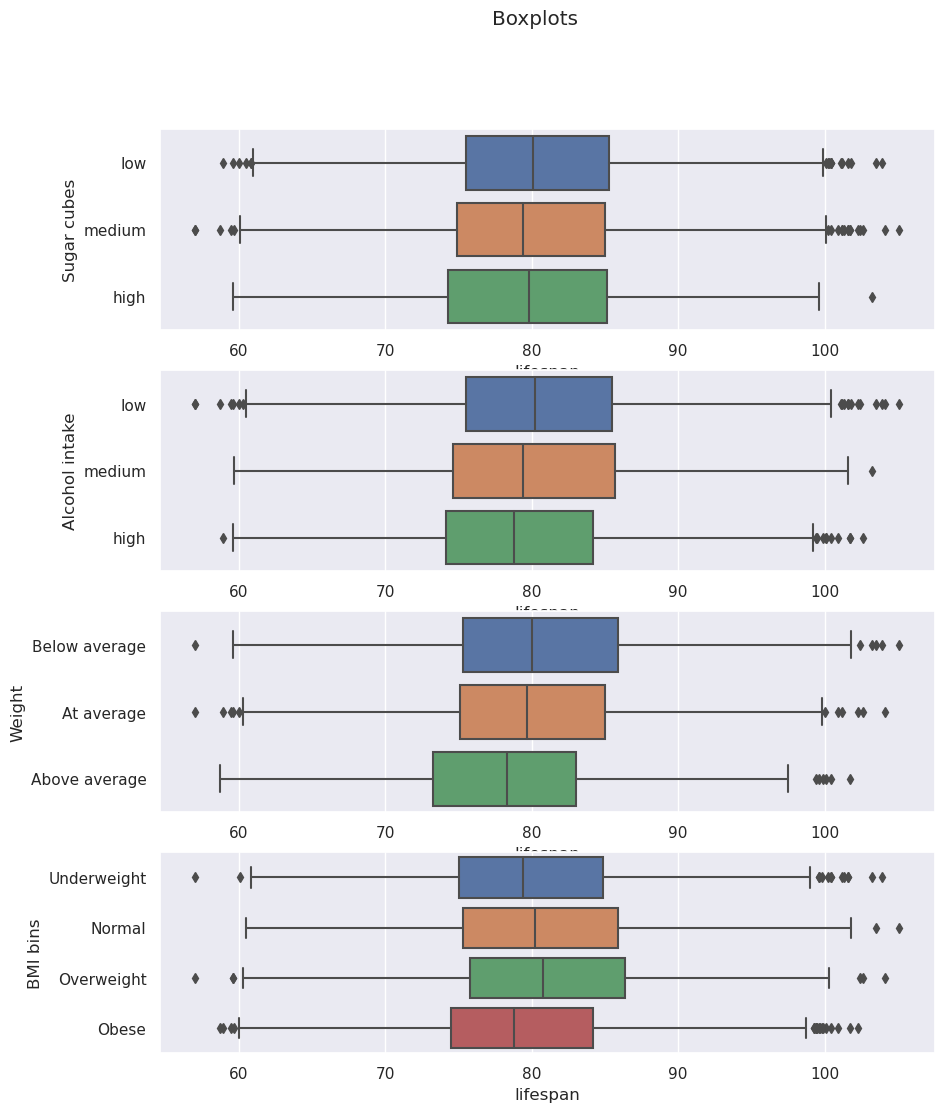

In [ ]:
# Show the interesting plots
fig, axes = plt.subplots(4, 1, figsize=(10, 12))
fig.suptitle('Boxplots')
sns.boxplot(ax=axes[0], x=df['lifespan'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[1], x=df['lifespan'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[2], x=df['lifespan'], y=df['Weight'])
sns.boxplot(ax=axes[3], x=df['lifespan'], y=df['BMI bins'])

## Correlation heatmap plot

/tmp/ipykernel_622/3663336505.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,genetic,length,mass,BMI,exercise,smoking,alcohol,sugar,lifespan
genetic,1.000000,-0.029606,0.000513,0.009993,-0.035005,-0.015490,-0.013170,0.018785,0.949799
length,-0.029606,1.000000,0.000106,-0.439235,0.011401,-0.020691,-0.007162,0.007860,0.013155
mass,0.000513,0.000106,1.000000,0.887942,0.008204,-0.009541,0.000726,0.005601,-0.066040
BMI,0.009993,-0.439235,0.887942,1.000000,0.002004,0.005430,0.003308,0.001881,-0.074159
exercise,-0.035005,0.011401,0.008204,0.002004,1.000000,0.021512,-0.024521,-0.008328,0.082986
smoking,-0.015490,-0.020691,-0.009541,0.005430,0.021512,1.000000,-0.012298,0.008925,-0.246140
alcohol,-0.013170,-0.007162,0.000726,0.003308,-0.024521,-0.012298,1.000000,0.003860,-0.063539
sugar,0.018785,0.007860,0.005601,0.001881,-0.008328,0.008925,0.003860,1.000000,-0.010887
lifespan,0.949799,0.013155,-0.066040,-0.074159,0.082986,-0.246140,-0.063539,-0.010887,1.000000


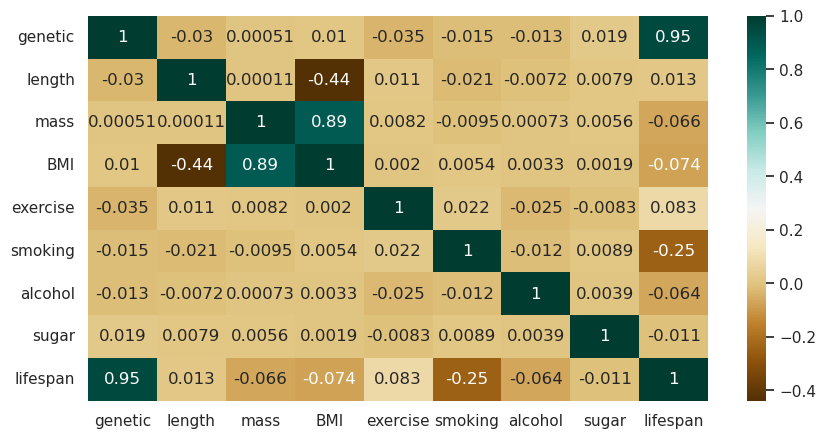

In [ ]:
# Correlation heatmap plot
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

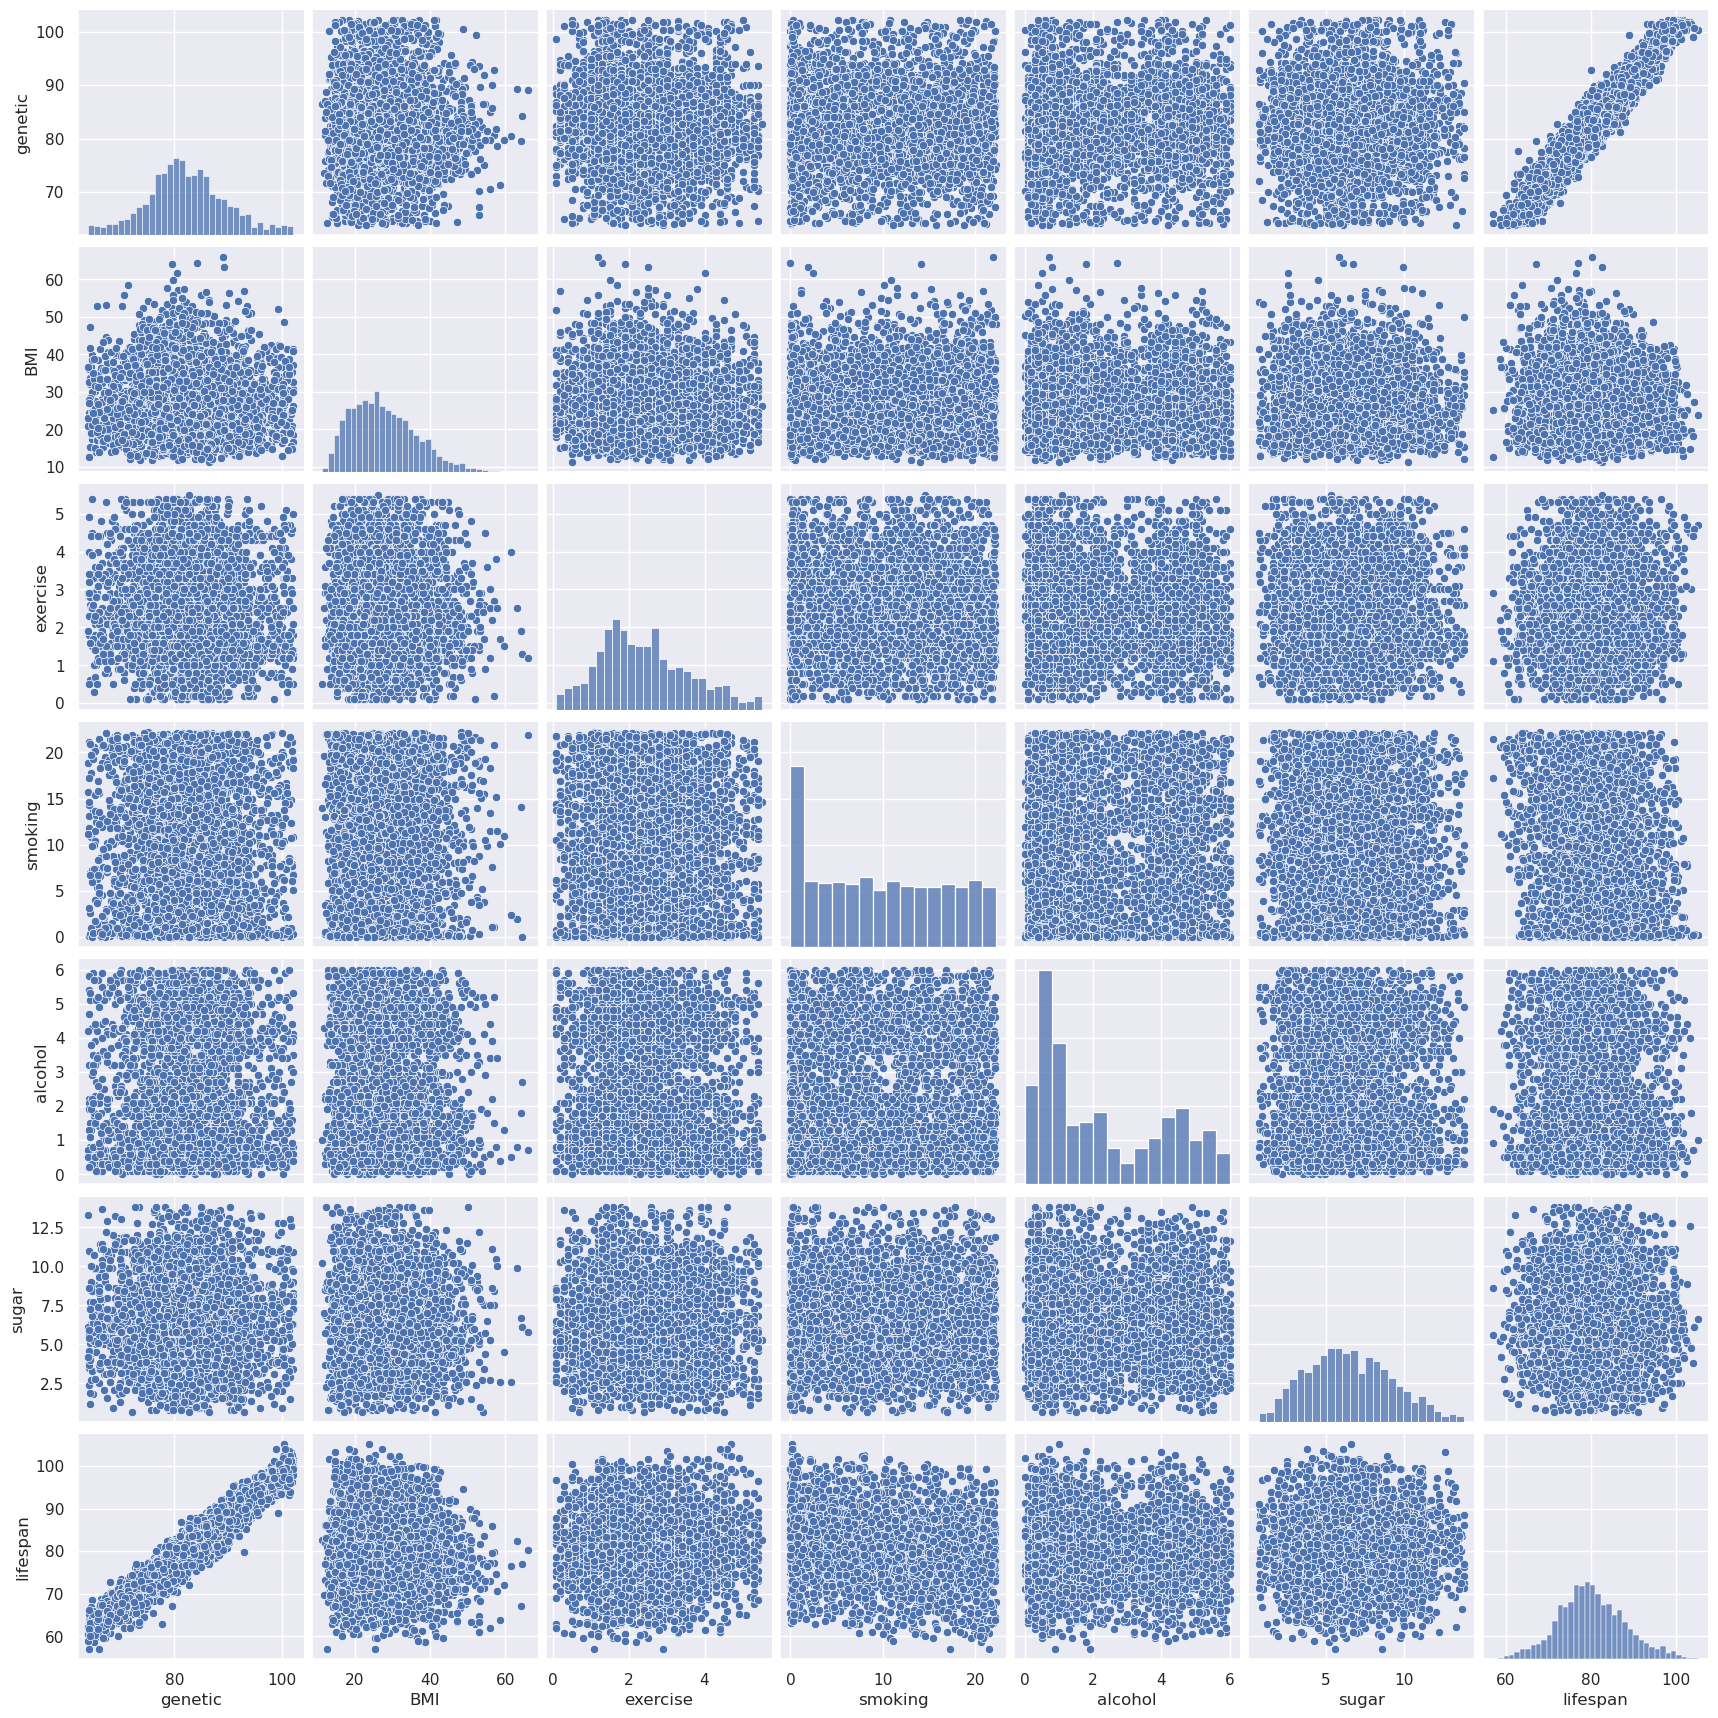

In [ ]:
sns.pairplot(df.loc[:, ~df.columns.isin(['mass', 'length'])])
plt.show()